In [1]:
!pip install ultralytics roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 101.3 MB/s eta 0:00:00


In [7]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
from google.colab import files
import shutil
import requests
from PIL import Image
import numpy as np

**Проводим проверку на двух моделях:** детекция всех инвазивных растений и дообученной модели на детекцию борщевика сосновского

Загружаем изображения

In [14]:
#вставляем ссылку с картинкой
image_url1 = "https://static.mk.ru/upload/entities/2025/06/13/12/articles/facebookPicture/2b/e7/71/ff/7be1099642676cee96e6137b51b70187.jpg"
image_url2 = "https://www.housedigest.com/img/gallery/the-18-most-important-weeds-to-pull-in-late-summer-and-early-fall/purple-loosestrife-1722528028.jpg"
image_url3 = "https://thumbs.dreamstime.com/b/канадские-цветы-thistle-канадский-cirsium-arvense-также-ползучий-или-поля-в-185258387.jpg"

In [15]:
#записываем данные картинки
resp1 = requests.get(image_url1, stream=True, timeout=10)
resp1.raise_for_status()
image_array1 = np.asarray(bytearray(resp1.content), dtype="uint8")
image1 = cv2.imdecode(image_array1, cv2.IMREAD_COLOR)

resp2 = requests.get(image_url2, stream=True, timeout=10)
resp2.raise_for_status()
image_array2 = np.asarray(bytearray(resp2.content), dtype="uint8")
image2 = cv2.imdecode(image_array2, cv2.IMREAD_COLOR)

resp3 = requests.get(image_url3, stream=True, timeout=10)
resp3.raise_for_status()
image_array3 = np.asarray(bytearray(resp3.content), dtype="uint8")
image3 = cv2.imdecode(image_array3, cv2.IMREAD_COLOR)

Тестирование модели со всеми растениями invasive_detector

In [16]:
#выбрать файл с моделью и подгрузить в сессионное хранилище Колаб
#проверка обученной модели со свеми растениями - invasive_detector
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]
model_path = f"/content/{uploaded_filename}"
model1 = YOLO(model_path)

Saving invasive_detector_best.pt to invasive_detector_best (2).pt



0: 448x640 1 Japanese Knotweed, 176.2ms
Speed: 6.7ms preprocess, 176.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


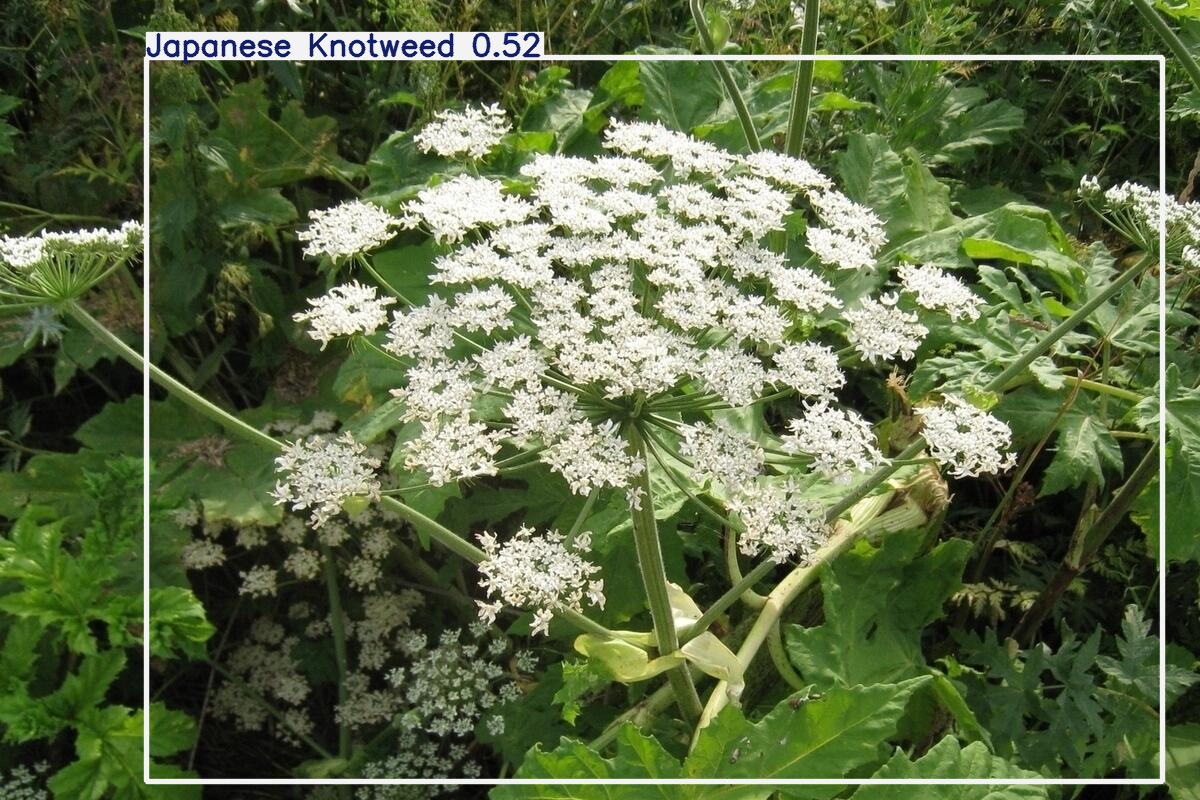


0: 384x640 1 Purple Loosestrife, 231.6ms
Speed: 4.0ms preprocess, 231.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


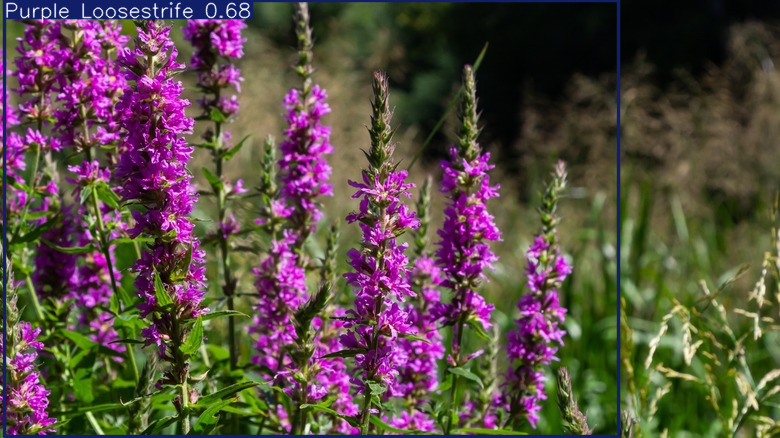


0: 480x640 1 Creeping Thistle, 293.6ms
Speed: 4.7ms preprocess, 293.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


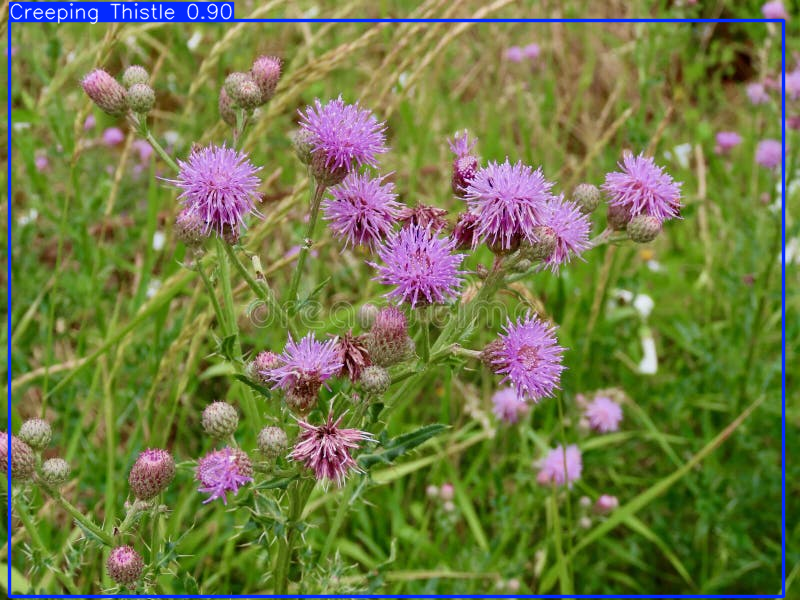

In [17]:
results1 = model1(image1, conf=0.25)
annotated_image1 = results1[0].plot()
cv2_imshow(annotated_image1)

results2 = model1(image2, conf=0.25)
annotated_image2 = results2[0].plot()
cv2_imshow(annotated_image2)

results3 = model1(image3, conf=0.25)
annotated_image3 = results3[0].plot()
cv2_imshow(annotated_image3)

Тестирование модели со специализацией на Борщевик Сосновского hogweed_detector

In [12]:
#выбрать файл с моделью и подгрузить в сессионное хранилище Колаб
#проверка обученной модели со свеми растениями - hogweed_detector
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]
model_path = f"/content/{uploaded_filename}"
model2 = YOLO(model_path)

Saving hogweed_detector_best.pt to hogweed_detector_best (1).pt



0: 448x640 1 hogweed_sosnowskyi, 266.6ms
Speed: 6.8ms preprocess, 266.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


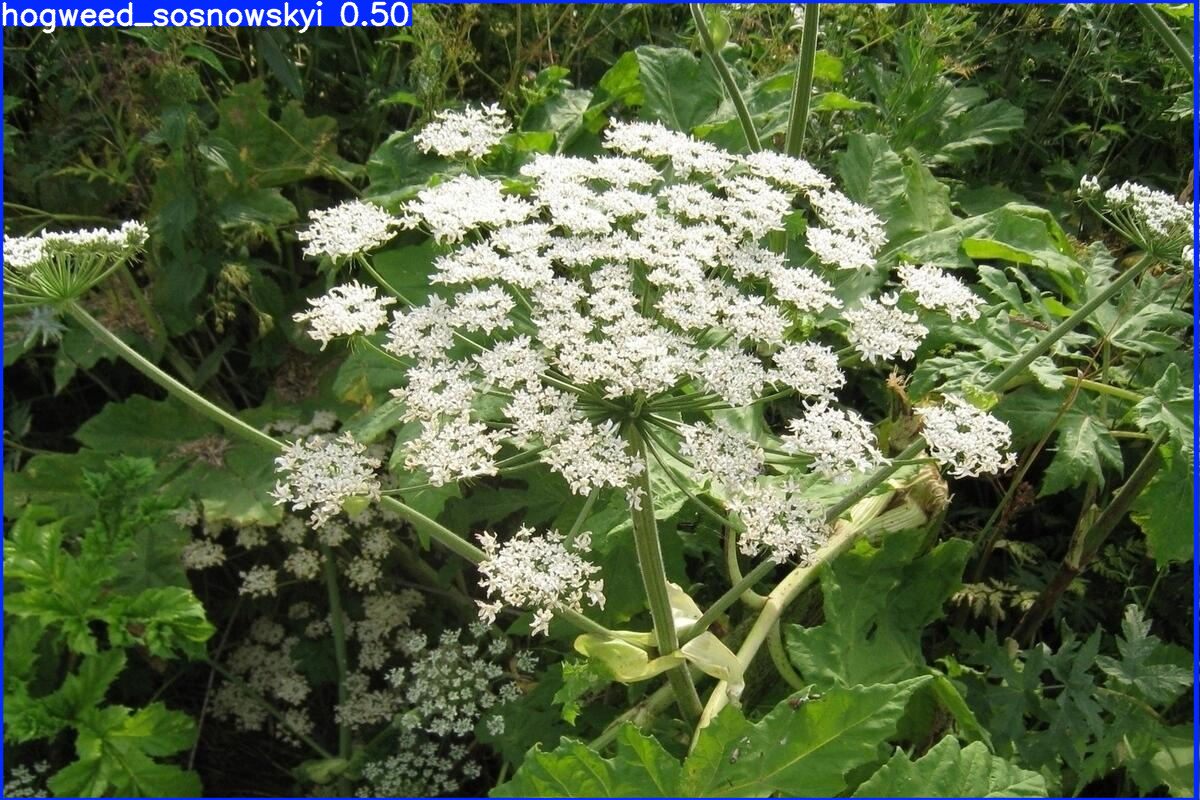


0: 384x640 (no detections), 299.6ms
Speed: 8.2ms preprocess, 299.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


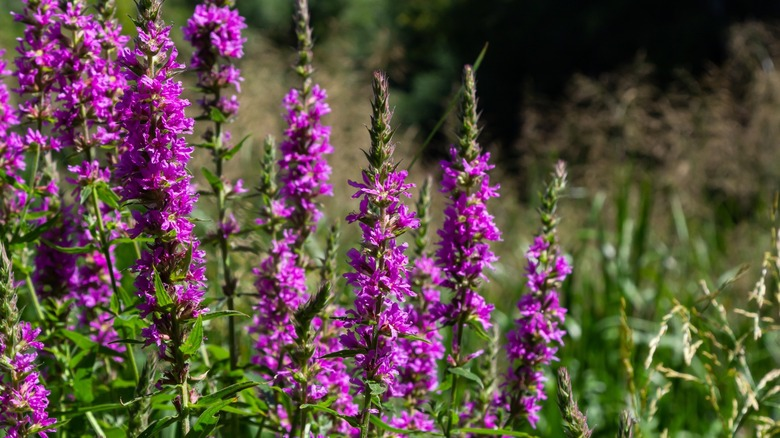


0: 480x640 (no detections), 323.4ms
Speed: 8.7ms preprocess, 323.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


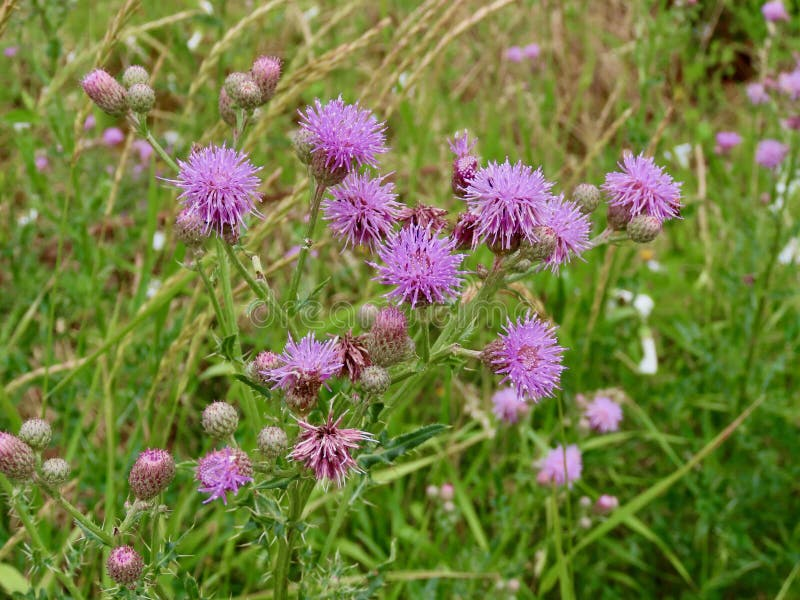

In [18]:
results1 = model2(image1, conf=0.25)
annotated_image1 = results1[0].plot()
cv2_imshow(annotated_image1)

results2 = model2(image2, conf=0.25)
annotated_image2 = results2[0].plot()
cv2_imshow(annotated_image2)

results3 = model2(image3, conf=0.25)
annotated_image3 = results3[0].plot()
cv2_imshow(annotated_image3)